# Setup


In [1]:
import pandas as pd
import json

# METADATA

1. `movie.metadata.tsv.gz` [3.4 M]


Metadata for 81,741 movies, extracted from the Noverber 4, 2012 dump of Freebase.  Tab-separated; columns:

1. Wikipedia movie ID
2. Freebase movie ID
3. Movie name
4. Movie release date
5. Movie box office revenue
6. Movie runtime
7. Movie languages (Freebase ID:name tuples)
8. Movie countries (Freebase ID:name tuples)
9. Movie genres (Freebase ID:name tuples)



2. `character.metadata.tsv.gz` [14 M]

Metadata for 450,669 characters aligned to the movies above, extracted from the Noverber 4, 2012 dump of Freebase.  Tab-separated; columns:

1. Wikipedia movie ID
2. Freebase movie ID
3. Movie release date
4. Character name
5. Actor date of birth
6. Actor gender
7. Actor height (in meters)
8. Actor ethnicity (Freebase ID)
9. Actor name
10. Actor age at movie release
11. Freebase character/actor map ID
12. Freebase character ID
13. Freebase actor ID

# Importing the datasets


In [2]:
movies_path = "data/movie.metadata.tsv"
character_path = "data/character.metadata.tsv"

movie_column_names = ["WikiID", "FreeID", "Title", "RelDate", "Revenue", "Runtime", "Languages", "Countries", "Genres"]
character_column_names = ["WikiID", "FreeID", "MovieRelDate", "CharName", "DOB", "Gender", "Height", "Ethnicity", "Actor", "Age", "FreeMapID", "FreeCharID", "FreeActorID"]

movies = pd.read_csv(movies_path, sep='\t', header=None, names=movie_column_names)
characters = pd.read_csv(character_path, sep='\t', header=None, names=character_column_names)

# Looking at the data

In [3]:
display(movies.head())
display(characters.head())

,WikiID,FreeID,Title,RelDate,Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


,WikiID,FreeID,MovieRelDate,CharName,DOB,Gender,Height,Ethnicity,Actor,Age,FreeMapID,FreeCharID,FreeActorID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg




*   Note : `RelDate`doesn't have a standard format



### Exploring length of the two datasets

In [4]:
n_mov = len(movies)
n_char = len(characters)
print('Number of rows in the movie.metadata dataset :', n_mov)
print('Number of rows in the character.metadata dataset :', n_char)

Number of rows in the movie.metadata dataset : 81741
Number of rows in the character.metadata dataset : 450669


# Cleaning Dictionaries
Columns `Languages`, `Countries`, `Genres` contain wikipedia ID + actual name for each entry. For the moment, keeping just the name for the sake of clarity

In [5]:
def extract_values(column):
  values = []
  column=json.loads(column)
  for key in column:
    values.append(column[key])
  return values

movies.Languages = movies.Languages.apply(extract_values)
movies.Countries = movies.Countries.apply(extract_values)
movies.Genres = movies.Genres.apply(extract_values)

In [6]:
display(movies[["Languages", "Countries", "Genres"]].head(2))

,Languages,Countries,Genres
0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"


# Duplicates

In [7]:
for column in movies.columns:
  duplicated_rows = movies[column].duplicated().sum()
  print("{} has {} duplicated rows".format(column, duplicated_rows))

WikiID has 0 duplicated rows
FreeID has 0 duplicated rows
Title has 6263 duplicated rows
RelDate has 61351 duplicated rows
Revenue has 74378 duplicated rows
Runtime has 81143 duplicated rows
Languages has 79924 duplicated rows
Countries has 79617 duplicated rows
Genres has 57924 duplicated rows


`WikiID`& `FreeID`-> Good

`Title`-> Bit concerning -> Check with Runtime


> ~~Runtime not enough. There are :~~

1.   ~~Movies with same runtime + Title but actually different~~
2.   ~~Movies with same runtime + Title but actually the same~~





In [8]:
movies[movies.Title=="Hunting Season"]

,WikiID,FreeID,Title,RelDate,Revenue,Runtime,Languages,Countries,Genres
62836,29666067,/m/0fphzrf,Hunting Season,1010-12-02,12160978.0,140.0,"[Turkish Language, English Language]",[Turkey],"[Crime Fiction, Mystery, Drama, Thriller]"


Wrong input for release date (1010->2010)

In [9]:
movies[movies.Title=="Harlow"]

,WikiID,FreeID,Title,RelDate,Revenue,Runtime,Languages,Countries,Genres
623,3670013,/m/09thsq,Harlow,1965-06-23,1000000.0,109.0,[English Language],[United States of America],"[Biographical film, Biography, Drama, Black-an..."
1223,27171821,/m/0bwklv0,Harlow,1965,NaN,109.0,[],[United States of America],[Biographical film]


Actually these are 2 different movies BUT first movie `WikiID`=3670013 has wrong rutime (correct =125).

So far couldn't find an example of a duplicated movie + No duplicated Wiki/Freebase IDs -> Lets trust the dataset 🙃

# Missing values

### Check for missing entries :
In which columns are they present, and for those columns : what is the percentage how missing entries.

In [10]:
movies.isna().any()

WikiID       False
FreeID       False
Title        False
RelDate       True
Revenue       True
Runtime       True
Languages    False
Countries    False
Genres       False
dtype: bool

In [11]:
print('Percentage of missing entries in the movie dataset:\n', 100*movies[['RelDate', 'Revenue', 'Runtime']].isna().sum() / n_mov)

Percentage of missing entries in the movie dataset:
 RelDate     8.443743
Revenue    89.722416
Runtime    25.018045
dtype: float64


There are 90% of revenues that are non specified. We probably won't be able to use this feature.  
8% of the release dates and 25% of the runtimes are missing, we can fill them if we find the correct ones.

In [12]:
characters.isna().any()

WikiID          False
FreeID          False
MovieRelDate     True
CharName         True
DOB              True
Gender           True
Height           True
Ethnicity        True
Actor            True
Age              True
FreeMapID       False
FreeCharID       True
FreeActorID      True
dtype: bool

In [13]:
print('Percentage of missing entries in the character dataset:\n', 100*characters[['MovieRelDate', 'CharName',
                                                                                   'DOB', 'Gender', 'Height', 'Ethnicity',
                                                                                   'Actor', 'Age', 'FreeCharID',
                                                                                   'FreeActorID']].isna().sum() / n_char)

Percentage of missing entries in the character dataset:
 MovieRelDate     2.217814
CharName        57.220488
DOB             23.552763
Gender          10.120288
Height          65.645740
Ethnicity       76.466542
Actor            0.272484
Age             35.084064
FreeCharID      57.218269
FreeActorID      0.180842
dtype: float64


# Wikidata API

To begin with there are some features like `Ethnicity` and `FreeCharId`that only have the Id of the Freebase database whose API is currently depreciated. To solve this problem we use the [Freebase/Wikidata Mappings](https://developers.google.com/freebase#freebase-wikidata-mappings) which as the name suggests maps the given Freebase Ids to WikiData.

- Note : The data has been created based on the Wikidata-Dump of October 28, 2013, and contains only those links that have at least two common Wikipedia-Links and not a single disagreeing Wikipedia-Link. Since the movies/characters dataset were gathered during that time too there is no time conflict.

In [14]:
mappings_path = "data/fb2w.nt.gz"
maps = pd.read_csv(mappings_path, sep='\t', header=None, skiprows=4, names=["Freebase", "W3", "Wiki"])
display(maps.head())

,Freebase,W3,Wiki
0,<http://rdf.freebase.com/ns/m.0695j>,<http://www.w3.org/2002/07/owl#sameAs>,<http://www.wikidata.org/entity/Q6718> .
1,<http://rdf.freebase.com/ns/m.05nrg>,<http://www.w3.org/2002/07/owl#sameAs>,<http://www.wikidata.org/entity/Q538> .
2,<http://rdf.freebase.com/ns/m.0jgd>,<http://www.w3.org/2002/07/owl#sameAs>,<http://www.wikidata.org/entity/Q414> .
3,<http://rdf.freebase.com/ns/m.0d_23>,<http://www.w3.org/2002/07/owl#sameAs>,<http://www.wikidata.org/entity/Q2537> .
4,<http://rdf.freebase.com/ns/m.04g7d>,<http://www.w3.org/2002/07/owl#sameAs>,<http://www.wikidata.org/entity/Q315> .


We only need the Id and not the whole website link so we transform columns in the following way :
- Freebase : <http://rdf.freebase.com/ns/m.CODE_ID> -> /m/CODE_ID
- Wiki : <http://www.wikidata.org/entity/CODE_ID> -> CODE_ID

In [15]:
"""
Transforms the Freebase website to Freebase ID
"""
def elim_freebase(web):
    return "/m/"+web[30:-1]

"""
Transforms the Freebase website to Freebase ID
"""
def elim_wiki(web):
    return web[32:-3]

In [16]:
maps["free"] = maps.Freebase.apply(elim_freebase)
maps["wiki"] = maps.Wiki.apply(elim_wiki)

# We don't need the rest of the columns so we drop them 
maps.drop(columns = ["Freebase", "W3", "Wiki"], inplace=True)
maps.head()

,free,wiki
0,/m/0695j,Q6718
1,/m/05nrg,Q538
2,/m/0jgd,Q414
3,/m/0d_23,Q2537
4,/m/04g7d,Q315


## Ethnicity labels

Firstly, we get the Wikidata IDs based on the mapping we created :

In [17]:
characters = characters.merge(maps, how="left", left_on="Ethnicity", right_on="free")
characters.drop(columns=["free"], inplace=True)
characters.rename(columns={"wiki":"Ethnicity_W"}, inplace=True)
display(characters)

,WikiID,FreeID,MovieRelDate,CharName,DOB,Gender,Height,Ethnicity,Actor,Age,FreeMapID,FreeCharID,FreeActorID,Ethnicity_W
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,NaN
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,NaN
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,Q49085
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,NaN
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450727,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv,NaN
450728,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j,NaN
450729,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44,Q42406
450730,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm,NaN


As we can see the mapping is not complete : Some Freebase IDs do not correspond to any Wikidata ID. 

In [18]:
unmapped_ethnicities = characters.Ethnicity_W.isna().sum() - characters.Ethnicity.isna().sum()
print("There are {} instances of ethnicities that we could not map from Freebase to Wikidata".format(unmapped_ethnicities))
# Instances of ethnicities -> Can we replace by number of actors ethnicities? Actors with different initial ethnicities ?

There are 12992 instances of ethnicities that we could not map from Freebase to Wikidata


In [19]:
from wikidata.client import Client

"""
Given a Wikidata ID (eg. "Q49085") returns the corresponding label 

Using this function row by row (pd.apply method) takes enormous time -> improvement? For ethnicities its ok as they're only 350 dinstinct ones
"""
def get_wikidata_label(wikidata_id):
    client = Client()
    entity = client.get(wikidata_id, load=True)
    return str(entity.label)

In [20]:
# No official comment haha this will probably change (Takes 2-3 minutes to complete). 
# Result is map_Ethnicity_W_to_Ethnicity_name a map between Ethnicity wikidata ID and Ethnicity label
map_Ethnicity_W_to_Ethnicity_name = pd.DataFrame(characters.Ethnicity_W.unique(), columns=["Ethnicity_W"]).dropna()
map_Ethnicity_W_to_Ethnicity_name["Ethnicity_name"] = map_Ethnicity_W_to_Ethnicity_name.Ethnicity_W.apply(get_wikidata_label)

In [21]:
characters = characters.merge(map_Ethnicity_W_to_Ethnicity_name, how="left", left_on="Ethnicity_W", right_on="Ethnicity_W").drop(columns= ["Ethnicity", "Ethnicity_W"])
display(characters)

,WikiID,FreeID,MovieRelDate,CharName,DOB,Gender,Height,Actor,Age,FreeMapID,FreeCharID,FreeActorID,Ethnicity_name
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,NaN
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,NaN
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,African Americans
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,NaN
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450727,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv,NaN
450728,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j,NaN
450729,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44,English people
450730,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm,NaN


In [22]:
characters.Ethnicity_name.value_counts()[:10] 
# Should we even continue with these ethnicities ? These results aren't affected by the lack of mappings between Freebase and Wiki

Indians              16351
African Americans    10159
Jewish people        10121
English people        6165
Irish Americans       3857
Italian Americans     2956
white Americans       2250
Scottish American     2223
Irish people          1637
French                1350
Name: Ethnicity_name, dtype: int64

In [23]:
ethn_len = len(characters.Ethnicity_name.value_counts())
ethn_len

355

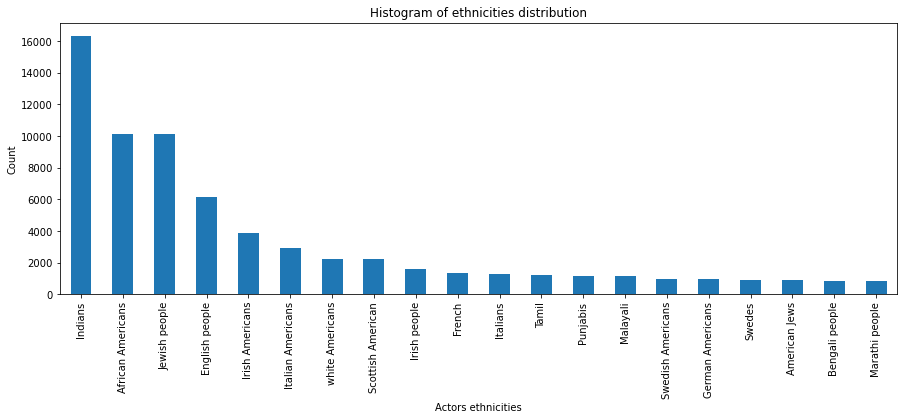

In [24]:
# Ethnicities visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
characters.Ethnicity_name.value_counts()[:20].plot(kind="bar")
plt.xlabel('Actors ethnicities')
plt.ylabel('Count')
plt.title('Distribution of the twenty most represented ethnicities');

The whole ethnicities plot was not really readable, should do :
- what are the most present ones (ex 20 first) 
- group some ethnicities together into big categories

### I don't know on what I should base the big ethnicity categories : maybe
- American Indian or Alaska Native
- Asian
- Black or African American
- Hispanic or Latino
- Native Hawaiian or Other Pacific Islander
- White

## Actors
In addition, some actors do not have their name and/or date of birth and/or sex specified but the actor freebase ID is present. We can use the actor freebase ID to recover their Wikidata information. This gives us access to the following relevant information about the actor :
- Name
- Sex/Gender
- Date of Birth
We can therefore replace the missing values in those categories.

In [25]:
print('Number of rows where:\n\tActor is missing but actor ID is specified :', len(characters[(characters['Actor'].isna() & ~characters['FreeActorID'].isna())]))
print('\tActor and DOB are missing but actor ID is specified :', len(characters[(characters['Actor'].isna() & characters['DOB'].isna() & ~characters['FreeActorID'].isna())]))
print('\tActor and Gender are missing but actor ID is specified :', len(characters[(characters['Actor'].isna() & characters['Gender'].isna() & ~characters['FreeActorID'].isna())]))
print('\tActor, DOB and Gender are missing but actor ID is specified :', len(characters[(characters['Actor'].isna() & characters['DOB'].isna() & characters['Gender'].isna() & ~characters['FreeActorID'].isna())]))
print('\tDOB is missing but Actor and actor ID are specified :', len(characters[(~characters['Actor'].isna() & characters['DOB'].isna() & ~characters['FreeActorID'].isna())]))
print('\tGender is missing but Actor and actor ID are specified :', len(characters[(~characters['Actor'].isna() & characters['Gender'].isna() & ~characters['FreeActorID'].isna())]))
print('\tDOB and Gender are missing but Actor and actor ID are specified :', len(characters[(~characters['Actor'].isna() & characters['DOB'].isna() & characters['Gender'] & ~characters['FreeActorID'].isna())]))


Number of rows where:
	Actor is missing but actor ID is specified : 413
	Actor and DOB are missing but actor ID is specified : 400
	Actor and Gender are missing but actor ID is specified : 401
	Actor, DOB and Gender are missing but actor ID is specified : 400
	DOB is missing but Actor and actor ID are specified : 104930
	Gender is missing but Actor and actor ID are specified : 44393
	DOB and Gender are missing but Actor and actor ID are specified : 62635


### Getting missing Actor names

In [26]:
characters = characters.merge(maps, how="left", left_on="FreeActorID", right_on="free")
characters.drop(columns=["FreeActorID"], inplace=True)
characters.rename(columns={"wiki":"WikiActorID"}, inplace=True)
display(characters)

,WikiID,FreeID,MovieRelDate,CharName,DOB,Gender,Height,Actor,Age,FreeMapID,FreeCharID,Ethnicity_name,free,WikiActorID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,NaN,/m/03wcfv7,Q1873468
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,NaN,/m/0346l4,Q230527
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,African Americans,/m/01vw26l,Q173637
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,NaN,/m/034hyc,Q169963
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,NaN,/m/01y9xg,Q233347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450745,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,NaN,/m/0b_vcv,Q5298405
450746,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,NaN,/m/0bx7_j,Q3809919
450747,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,David Hemmings,15.0,/m/0g8ngmc,NaN,English people,NaN,NaN
450748,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,NaN,NaN,NaN


In [27]:
missing_actor = characters[(characters['Actor'].isna() & ~characters['WikiActorID'].isna())]

In [28]:
# No official comment haha this will probably change (Takes 2-3 minutes to complete). 
# Result is map_Ethnicity_W_to_Ethnicity_name a map between Ethnicity wikidata ID and Ethnicity label
map_WikiActorId_Actor = pd.DataFrame(missing_actor.WikiActorID.unique(), columns=["WikiActorID"]).dropna()
map_WikiActorId_Actor["Actor"] = map_WikiActorId_Actor.WikiActorID.apply(get_wikidata_label)

In [29]:
characters = characters.merge(map_WikiActorId_Actor, how="left", left_on="WikiActorID", right_on="WikiActorID").drop(columns= ["WikiActorID", "WikiActorID"])
characters.drop(columns="free", inplace=True)

In [31]:
characters["Actor"] = characters.fillna(value={"Actor_x":""}).Actor_x + characters.fillna(value={"Actor_y":""}).Actor_y
characters.drop(columns=["Actor_x", "Actor_y"], inplace=True)

In [32]:
characters

,WikiID,FreeID,MovieRelDate,CharName,DOB,Gender,Height,Age,FreeMapID,FreeCharID,Ethnicity_name,Actor
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,42.0,/m/0bgchxw,/m/0bgcj3x,NaN,Wanda De Jesus
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,27.0,/m/0jys3m,/m/0bgchn4,NaN,Natasha Henstridge
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,32.0,/m/0jys3g,/m/0bgchn_,African Americans,Ice Cube
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,33.0,/m/02vchl6,/m/0bgchnq,NaN,Jason Statham
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,23.0,/m/02vbb3r,/m/0bgchp9,NaN,Clea DuVall
...,...,...,...,...,...,...,...,...,...,...,...,...
450745,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,/m/0kr406c,/m/0kr406h,NaN,Dorothy Elias-Fahn
450746,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,27.0,/m/0kr405_,/m/0kr4090,NaN,Jonathan Fahn
450747,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,15.0,/m/0g8ngmc,NaN,English people,David Hemmings
450748,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,/m/0g8ngmj,NaN,NaN,Roberta Paterson


From wikidata actor page,
- sex/gender (P21) is given as : male (Q6581097), female (Q6581072), intersex (Q1097630), transgender female (Q1052281), transgender male (Q2449503).
- date of birth (P569) is given as : Day of the month as a zero-padded decimal number, blank space, Month full name, blank space, Year with century as a decimal number. To recover the date of birth in the same format as the ones in the characters dataset, we must read the date given by wikidata without the blank spaces and then use datetime to format it correctly. See example just below :

In [33]:
from datetime import datetime
wiki_date = '26 December 1949'
no_space = wiki_date.replace(" ", "")
date = datetime.strptime(no_space, '%d''%B''%Y')
formated_date = '{:%Y-%m-%d}'.format(date)
print(formated_date)

1949-12-26


# DATA

This part deals with plot summaries data.

1. `plot_summaries.txt.gz` [29 M]

Plot summaries of 42,306 movies extracted from the November 2, 2012 dump of English-language Wikipedia.  Each line contains the Wikipedia movie ID (which indexes into `movie.metadata.tsv`) followed by the summary.


2. `corenlp_plot_summaries.tar.gz` [628 M, separate download]

The plot summaries from above, run through the Stanford CoreNLP pipeline (tagging, parsing, NER and coref). Each filename begins with the Wikipedia movie ID (which indexes into `movie.metadata.tsv`).


# TEST DATA

1. `tvtropes.clusters.txt`

72 character types drawn from tvtropes.com, along with 501 instances of those types.  The ID field indexes into the Freebase character/actor map ID in `character.metadata.tsv`.

2. `name.clusters.txt`


970 unique character names used in at least two different movies, along with 2,666 instances of those types.  The ID field indexes into the Freebase character/actor map ID in `character.metadata.tsv`.


In [34]:
tvtropes_path = "data/tvtropes.clusters.txt"
name_path = "data/name.clusters.txt"

##### Mapping: put clusters info into character dataset:

---